# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [32]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 57.7 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 50.8 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.0 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 70.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 57.0 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 75.6 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 42.8 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 74.1 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 44.9 MB/s eta 0:00:01
     |██████████████████

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# more imports
from torch.utils.data import DataLoader

In [6]:
# Define transforms
transform = transforms.Compose(
    [
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(28, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5,),(0.5))
    ]
)

# Create training set and define training dataloader
data = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)
training_data, val_data = torch.utils.data.random_split(data, [50000, 10000], torch.Generator().manual_seed(42))
training = DataLoader(training_data, batch_size=16, shuffle=True)
validating = DataLoader(val_data, batch_size=16, shuffle=True)
# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transform)
test = DataLoader(test_data, batch_size=16) 

In [7]:
# CHECKING THE DATATYPES
does = None
for i in iter(training):
    does = i
    break
print(does[0][0])

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -0.3412, -0.3412, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -0.1137, -0.1137,  0.0039,
           0.9843,  1.0000,  0.9843,  0.3098, -0.5608, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -0.6000,  0

In [13]:
# Understanding data
print(f"Total number of train images: {len(training_data)}")
print(f"Total number of test images: {len(test_data)}")

print(f"Train classes: {data.classes}")

print(f"Image shape: {training_data[5][0].shape}")
print("Image 16 label: {}".format(training_data[16][1]))

Total number of train images: 50000
Total number of test images: 10000
Train classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Image shape: torch.Size([1, 28, 28])
Image 16 label: 6


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I first of all made random rotations and flips of my data so that the model maybe exposed to a variety of the samples this enables it to see variations of the data hence train better, the same goes to the random cropping, I then changed the points to tensors so that they can be ready for processing in pytorch, lastly I normalized the data.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [14]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


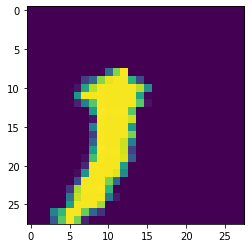

8


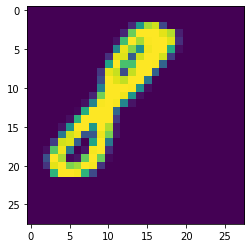

1


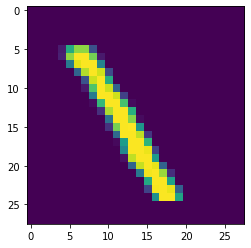

4


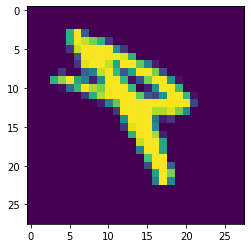

4


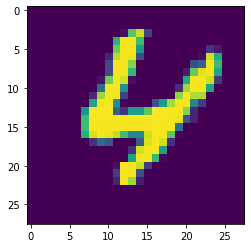

In [15]:
# Explore data
show5(training)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [16]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(784, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 10)

    def forward(self, x):
        x =  torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [21]:
## YOUR CODE HERE ##
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [22]:
def train_model(model, training, testing, num_epochs):
    if torch.cuda.is_available():
        model = model.cuda()

    train_losses = list()
    train_accuracy = list()

    val_losses = list()
    val_accuracy = list()

    for epoch in range(num_epochs):
        model.train()

        train_loss = 0
        train_correct = 0

        val_loss = 0
        val_correct = 0

        for data in training:
            images, labels = data

            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            _, predictions = torch.max(outputs.data, 1)
            train_correct += sum(predictions == labels)/len(predictions == labels)
            train_loss += loss.item()

        train_losses.append(train_loss/len(training))
#         train_accuracy.append(train_correct/len(train_loader))
        print(f"Epoch: {epoch+1} Train Accuracy: {(train_correct/len(training)):.4f}% Train Loss: {(train_loss/len(training)):.4f}")

        model.eval()

        for data in testing:
            images, labels = data

            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()

            outputs = model(images)
            loss = criterion(outputs, labels)

            _, predictions = torch.max(outputs.data, 1)
            val_correct += sum(predictions == labels)/len(predictions == labels)
            val_loss += loss.item()

        val_losses.append(val_loss/len(testing))
#         val_accuracy.append(val_correct/len(val_loader))
        print(f"Epoch: {epoch+1} Validation Accuracy: {(val_correct/len(testing)):.4f} Validation Loss: {(val_loss/len(testing)):.4f}")
    return train_losses, val_losses

In [23]:
 train_loss_hist, val_loss_hist = train_model(model, training, validating, 10)

Epoch: 1 Train Accuracy: 0.5188% Train Loss: 1.3601
Epoch: 1 Validation Accuracy: 0.6345 Validation Loss: 1.0623
Epoch: 2 Train Accuracy: 0.6655% Train Loss: 0.9777
Epoch: 2 Validation Accuracy: 0.6813 Validation Loss: 0.9516
Epoch: 3 Train Accuracy: 0.6901% Train Loss: 0.9117
Epoch: 3 Validation Accuracy: 0.6853 Validation Loss: 0.9257
Epoch: 4 Train Accuracy: 0.7016% Train Loss: 0.8845
Epoch: 4 Validation Accuracy: 0.7034 Validation Loss: 0.8885
Epoch: 5 Train Accuracy: 0.7092% Train Loss: 0.8603
Epoch: 5 Validation Accuracy: 0.6884 Validation Loss: 0.9706
Epoch: 6 Train Accuracy: 0.7150% Train Loss: 0.8530
Epoch: 6 Validation Accuracy: 0.7191 Validation Loss: 0.8212
Epoch: 7 Train Accuracy: 0.7183% Train Loss: 0.8479
Epoch: 7 Validation Accuracy: 0.7264 Validation Loss: 0.8077
Epoch: 8 Train Accuracy: 0.7287% Train Loss: 0.8186
Epoch: 8 Validation Accuracy: 0.7126 Validation Loss: 0.8950
Epoch: 9 Train Accuracy: 0.7286% Train Loss: 0.8207
Epoch: 9 Validation Accuracy: 0.7350 Validat

Plot the training loss (and validation loss/accuracy, if recorded).

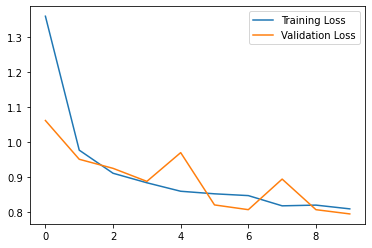

In [24]:
## YOUR CODE HERE ##
plt.plot(train_loss_hist, label="Training Loss")
plt.plot(val_loss_hist, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [25]:
# VALIDATION STEP
def print_test_accuracy(model, test):
    val_loss = 0.0
    val_correct = 0
    model.eval()
    for inputs, labels in test:
        if torch.cuda.is_available():
            model.to('cuda')
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += sum(preds == labels)/len(preds == labels)
        val_loss += loss.item()
    print(f'The test accuracy: {(val_correct/len(test) * 100):.2f}%')
print_test_accuracy(model, test)

The test accuracy: 75.43%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

## What I Did
I made the network deeper and changed the optimizer from ADAM to SDG, increased the number of epochs to 20, with this I was able to increase the sufficiency 

In [26]:
## YOUR CODE HERE ##
class ImprovedNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(784, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 10)

    def forward(self, x):
        x =  torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        return self.layer5(x)

## Added Momentum to my Oprimizer

In [27]:
new_model = ImprovedNet()
optimizer = optim.SGD(new_model.parameters(), lr=0.005, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [28]:
# training the new model, Also increased number of epochs
train_loss_hist, val_loss_hist = train_model(new_model, training, validating, 20)

Epoch: 1 Train Accuracy: 0.5051% Train Loss: 1.3747
Epoch: 1 Validation Accuracy: 0.6678 Validation Loss: 0.9120
Epoch: 2 Train Accuracy: 0.7592% Train Loss: 0.6985
Epoch: 2 Validation Accuracy: 0.7910 Validation Loss: 0.5929
Epoch: 3 Train Accuracy: 0.8135% Train Loss: 0.5466
Epoch: 3 Validation Accuracy: 0.8376 Validation Loss: 0.4771
Epoch: 4 Train Accuracy: 0.8399% Train Loss: 0.4685
Epoch: 4 Validation Accuracy: 0.8582 Validation Loss: 0.4365
Epoch: 5 Train Accuracy: 0.8601% Train Loss: 0.4171
Epoch: 5 Validation Accuracy: 0.8425 Validation Loss: 0.4779
Epoch: 6 Train Accuracy: 0.8716% Train Loss: 0.3832
Epoch: 6 Validation Accuracy: 0.8756 Validation Loss: 0.3759
Epoch: 7 Train Accuracy: 0.8808% Train Loss: 0.3572
Epoch: 7 Validation Accuracy: 0.8941 Validation Loss: 0.3308
Epoch: 8 Train Accuracy: 0.8900% Train Loss: 0.3345
Epoch: 8 Validation Accuracy: 0.9002 Validation Loss: 0.3013
Epoch: 9 Train Accuracy: 0.8953% Train Loss: 0.3165
Epoch: 9 Validation Accuracy: 0.8971 Validat

In [29]:
# testing the model
print_test_accuracy(new_model, test)

The test accuracy: 92.66%


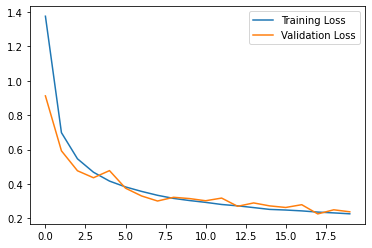

In [30]:
# plotting validation and train validations
plt.plot(train_loss_hist, label="Training Loss")
plt.plot(val_loss_hist, label="Validation Loss")
plt.legend()
plt.show()

## Saving your model
Using `torch.save`, save your model for future loading.

In [33]:
MODEL_PATH = os.getcwd()
if "Models" not in os.listdir():
    os.makedirs('Models')
MODEL_PATH = os.path.join(os.getcwd(), "Models\\model.pth")
torch.save(new_model, MODEL_PATH)